<a href="https://colab.research.google.com/github/kamranjaved/Arabic_OCR/blob/main/Document_BG_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Document Background Removal

Input: Scanned document or image (color or grayscale)

Step 1 – Grayscale Conversion (🎨): Simplifies image by keeping intensity, discarding color.

Step 2 – Thresholding / Background Removal (✂️): Separates text from background using adaptive or binary thresholding.

Step 3 – Noise Removal (🧹): Removes small specks and smooths edges using morphological operations.

Step 4 – Text Filling (🖋): Connects broken or thin strokes to make text solid.

Output (✅): Clean, black-and-white document ready for OCR or further processing.

In [17]:
import cv2
import numpy as np
import os

# Input and output folders
input_folder = "input_images"     # folder with original images
output_folder = "output_images"   # folder to save processed images

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop over all images in input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".png", ".jpg", ".jpeg", ".tif")):
        # Load image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding
        thresh3 = cv2.adaptiveThreshold(
            gray, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,
            11, 10
        )

        # Invert if needed (white text on black)
        #thresh = cv2.bitwise_not(thresh)

        # Create a small kernel
        kernel = np.ones((2,2), np.uint8)

        # Remove small white noise in black text
        bw_clean = cv2.morphologyEx(thresh3, cv2.MORPH_OPEN, kernel)

        # Optional: close small gaps in text
        bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_CLOSE, kernel)



        kernel = np.ones((2,2), np.uint8)

        # First remove noise (small dots)
        bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_OPEN, kernel)

        # Then connect broken text strokes
        bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_CLOSE, kernel)

        # Simple binary threshold
        #_, bw = cv2.threshold(thresh3, 127, 255, cv2.THRESH_BINARY)
        # Kernel size controls how much you fill text
        #kernel = np.ones((3,3), np.uint8)
        #filled_text = cv2.dilate(bw_clean, kernel, iterations=1)

        # Save processed image
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, bw_clean)

print("All images processed and saved!")


All images processed and saved!


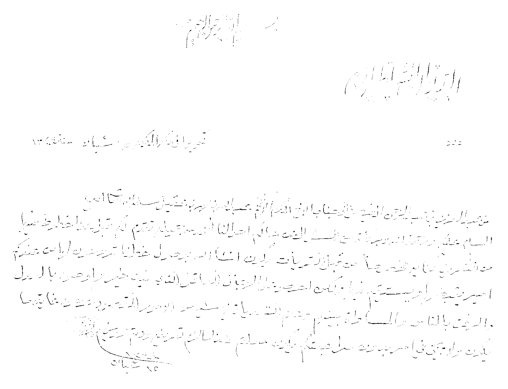

In [13]:
plt.imshow(filled_text,cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

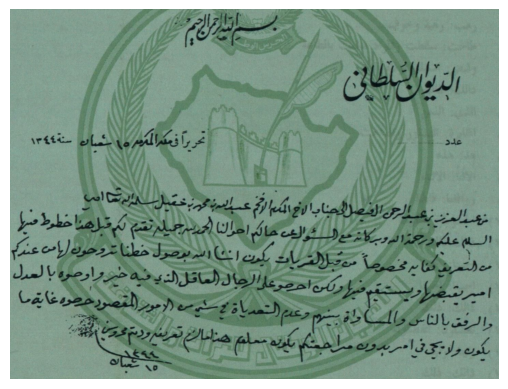

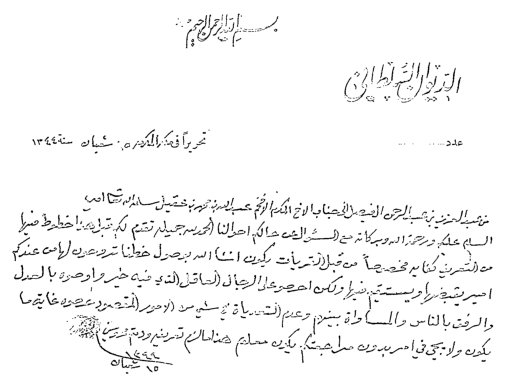

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("input_images/H_W_Text_13.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh3 = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 15
)

# Invert if needed (white text on black)
#thresh = cv2.bitwise_not(thresh)

# Create a small kernel
kernel = np.ones((2,2), np.uint8)

# Remove small white noise in black text
bw_clean = cv2.morphologyEx(thresh3, cv2.MORPH_OPEN, kernel)

# Optional: close small gaps in text
bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_CLOSE, kernel)



kernel = np.ones((2,2), np.uint8)

# First remove noise (small dots)
#bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_OPEN, kernel)

# Then connect broken text strokes
bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_CLOSE, kernel)

# Simple binary threshold
#_, bw = cv2.threshold(thresh3, 127, 255, cv2.THRESH_BINARY)
# Kernel size controls how much you fill text
kernel = np.ones((3,3), np.uint8)
filled_text = cv2.dilate(bw_clean, kernel, iterations=1)

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(bw_clean,cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

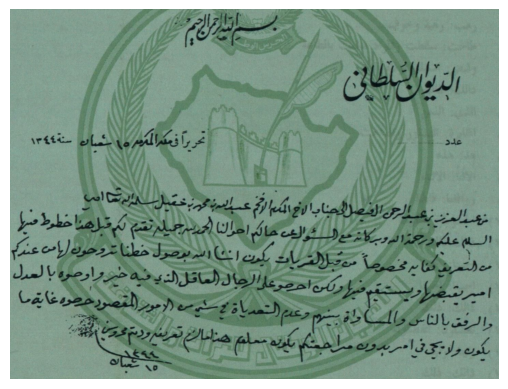

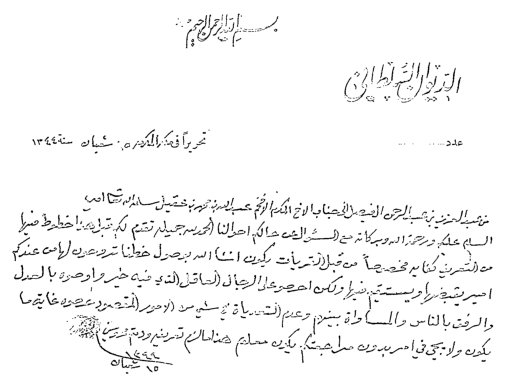

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("input_images/H_W_Text_13.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh3 = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 15
)

# Invert if needed (white text on black)
#thresh = cv2.bitwise_not(thresh)

# Create a small kernel
kernel = np.ones((2,2), np.uint8)

# Remove small white noise in black text
bw_clean = cv2.morphologyEx(thresh3, cv2.MORPH_OPEN, kernel)

# Optional: close small gaps in text
bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_CLOSE, kernel)



kernel = np.ones((2,2), np.uint8)

# First remove noise (small dots)
#bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_OPEN, kernel)

# Then connect broken text strokes
bw_clean = cv2.morphologyEx(bw_clean, cv2.MORPH_CLOSE, kernel)

# Simple binary threshold
#_, bw = cv2.threshold(thresh3, 127, 255, cv2.THRESH_BINARY)
# Kernel size controls how much you fill text
kernel = np.ones((3,3), np.uint8)
filled_text = cv2.dilate(bw_clean, kernel, iterations=1)

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(bw_clean,cmap='gray')
plt.axis('off')  # Hide axes
plt.show()